<a href="https://colab.research.google.com/github/Pongphan/ctransferlearning_ev/blob/main/ctransferlearning_ev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Recognition in EV's Egg Images

Pongphan Pongpanitanont

---

Biomedical Engineering, Medical Technology

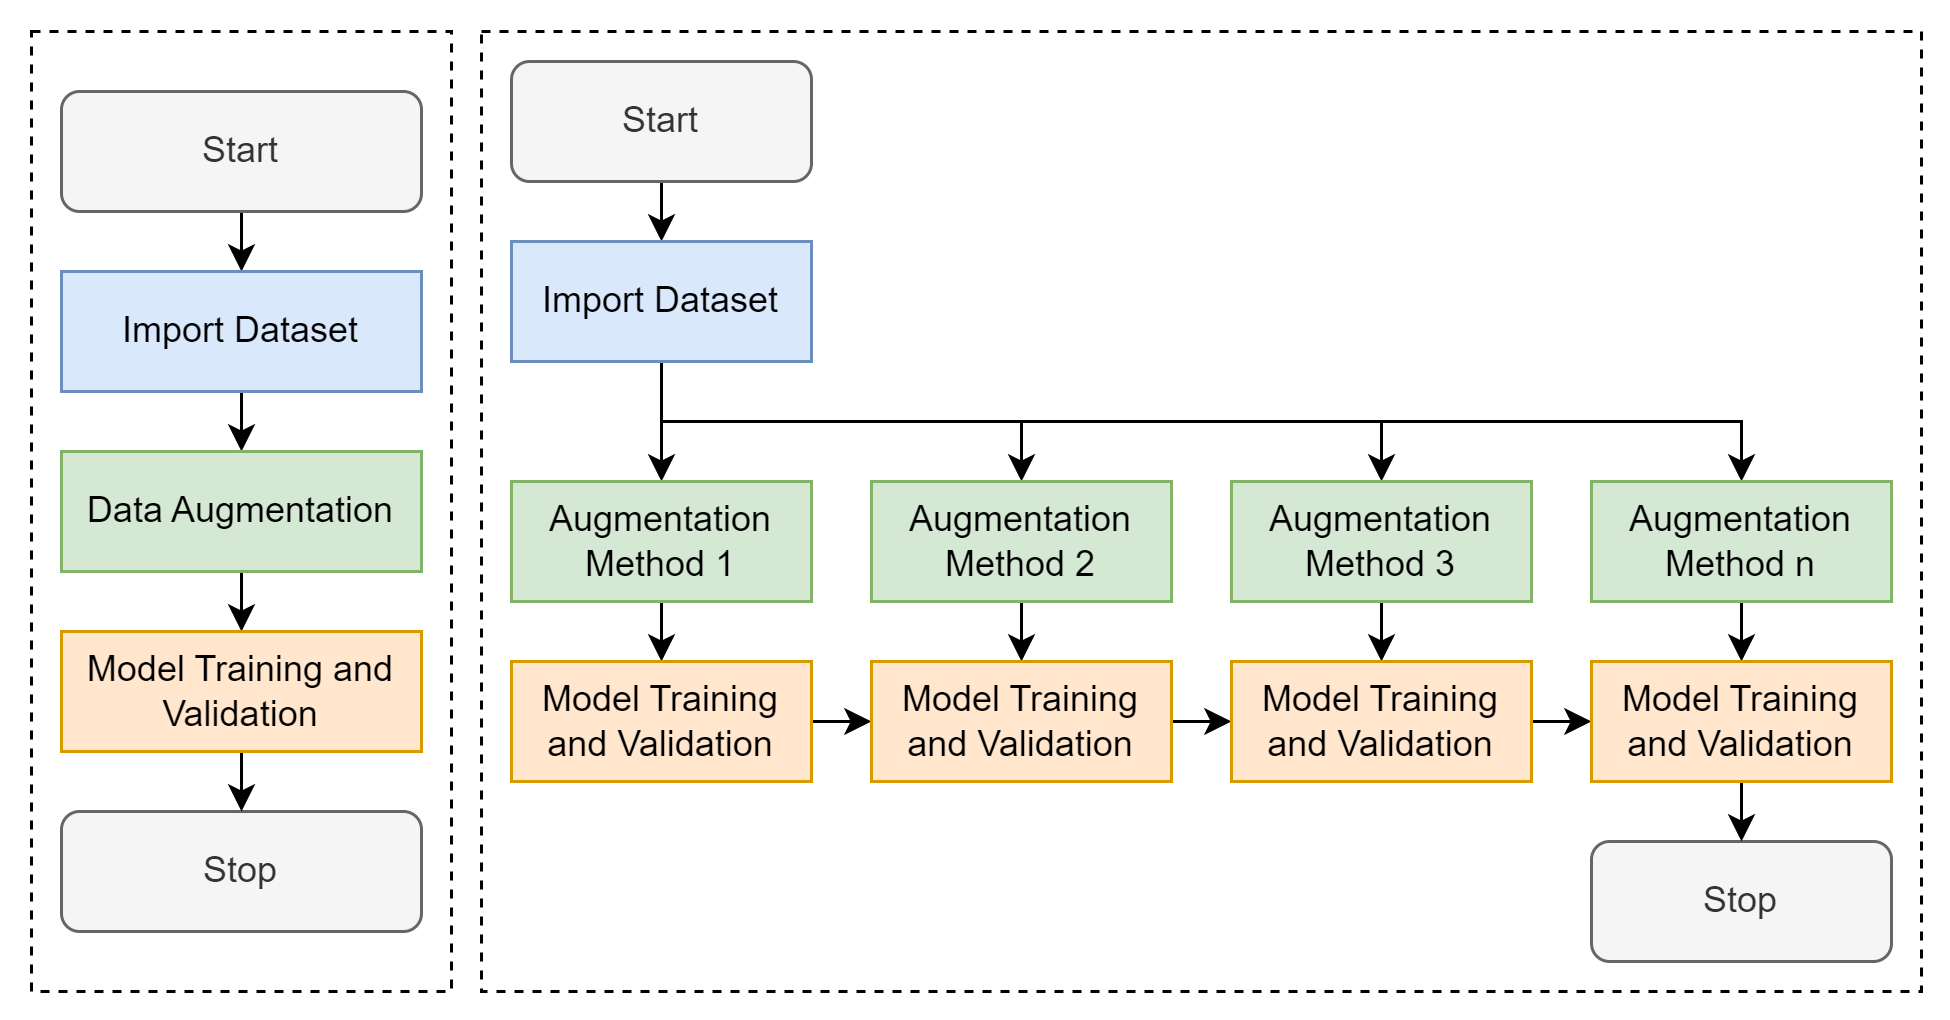

##Initial Condition

Mount with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extract an Images to Destination Path

In [ ]:
!mkdir dataset
!unzip /content/drive/MyDrive/ev_images/ev_datasets/ev_images.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/01_training_dataset/Class1_r/3208.png  
  inflating: dataset/01_training_dataset/Class1_r/3209.png  
  inflating: dataset/01_training_dataset/Class1_r/3210.png  
  inflating: dataset/01_training_dataset/Class1_r/3211.png  
  inflating: dataset/01_training_dataset/Class1_r/3212.png  
  inflating: dataset/01_training_dataset/Class1_r/3213.png  
  inflating: dataset/01_training_dataset/Class1_r/3214.png  
  inflating: dataset/01_training_dataset/Class1_r/3215.png  
  inflating: dataset/01_training_dataset/Class1_r/3216.png  
  inflating: dataset/01_training_dataset/Class1_r/3217.png  
  inflating: dataset/01_training_dataset/Class1_r/3218.png  
  inflating: dataset/01_training_dataset/Class1_r/3219.png  
  inflating: dataset/01_training_dataset/Class1_r/3220.png  
  inflating: dataset/01_training_dataset/Class1_r/3221.png  
  inflating: dataset/01_training_dataset/Class1_r/3222.png  
  inflating: dataset/01_training_d

Set Output Path

In [ ]:
path = "/content/drive/MyDrive/ev_images/ev_datasets/"

##Project Configuration

Setting k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=8)

Set Epoch

In [ ]:
set_epoch = 200

Model - CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def cnn():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (imsize,imsize,3)))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(8, (3, 3), activation = 'relu'))
  model.add(Conv2D(8, (3, 3), activation = 'relu'))
  model.add(Conv2D(8, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(256, activation = 'sigmoid'))
  model.add(Dense(64, activation = 'sigmoid'))
  model.add(Dense(16, activation = 'sigmoid'))
  model.add(Dense(2, activation = 'sigmoid'))

  model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])
  return model

Model - Resnet50

In [ ]:
from keras.applications import ResNet50

def resnet50():
  model = ResNet50(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - InceptionV3

In [ ]:
from keras.applications import InceptionV3

def inceptionv3():
  model = InceptionV3(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - VGG16

In [ ]:
from keras.applications import VGG16

def vgg16():
  model = VGG16(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - Densenet121

In [ ]:
from keras.applications import DenseNet121

def densenet121():
  model = DenseNet121(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - Xception

In [ ]:
from keras.applications import Xception

def xception():
  model = Xception(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Setting Stop Training Condition

In [ ]:
from keras.callbacks import Callback

class earlystopping_manual(Callback):
  def __init__(self, monitor='loss', value=0.001, verbose=1):
    super(Callback, self).__init__()
    self.monitor = monitor
    self.value = value
    self.verbose = verbose

  def on_epoch_end(self, epoch, logs={}):
    current = logs.get(self.monitor)
    if current < self.value:
      self.model.stop_training = True

##Model: Conventional Learning

###Prepare Images Dataset

Load Images Function

In [ ]:
import os
import cv2

def loadimages(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

Import an Original Images

In [ ]:
img_0 = []
img_0 += loadimages("/content/dataset/01_training_dataset/Class0")

In [ ]:
img_1 = []
img_1 += loadimages("/content/dataset/01_training_dataset/Class1")

In [ ]:
img_0_label = []
img_0_label += [0 for i in img_0]

img_1_label = []
img_1_label += [1 for i in img_1]

In [ ]:
img = []
img += img_0
img += img_1

img_label = []
img_label += img_0_label
img_label += img_1_label

print(len(img),',',len(img_label))

2000 , 2000


Import an Augmented Images

In [ ]:
aug_img_0 = []
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_gb")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_gn")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_mf")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_r")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_sp")

In [ ]:
aug_img_1 = []
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_gb")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_gn")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_mf")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_r")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_sp")

In [ ]:
aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]

aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

In [ ]:
aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

40000 , 40000


Import an Testing Images

In [ ]:
test_img_0 = []
test_img_0 += loadimages("/content/dataset/02_testing_dataset/Class0")

In [ ]:
test_img_1 = []
test_img_1 += loadimages("/content/dataset/02_testing_dataset/Class1")

In [ ]:
test_img_0_label = []
test_img_0_label += [0 for i in test_img_0]

test_img_1_label = []
test_img_1_label += [1 for i in test_img_1]

In [ ]:
test_img = []
test_img += test_img_0
test_img += test_img_1

test_img_label = []
test_img_label += test_img_0_label
test_img_label += test_img_1_label

print(len(test_img),',',len(test_img_label))

100 , 100


Preparing Input Images

In [ ]:
import numpy as np

imsize = 128

img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in img]
img = np.array(img, dtype=np.int32)

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

Preparing Output Images

In [ ]:
from keras.utils import to_categorical

img_label_cat = to_categorical(img_label)
img_label_cat = np.array(img_label_cat, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

###Model Training: A Comparison

####Training CNN with img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(img):
  x_train, x_test = img[train_ind], img[test_ind]
  y_train, y_test = img_label_cat[train_ind], img_label_cat[test_ind]

  model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch 1/200


Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/img_cnn.h5')

####Training CNN with Aug_img

In [ ]:
import datetime

current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 07:57:07.972291


Epoch 1/200
1000/1000 [==============================] - 24s 16ms/step - loss: 0.2571 - accuracy: 0.5167 - val_loss: 0.2474 - val_accuracy: 0.5856
Epoch 2/200
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2448 - accuracy: 0.6753 - val_loss: 0.2416 - val_accuracy: 0.6472
Epoch 3/200
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2375 - accuracy: 0.7018 - val_loss: 0.2316 - val_accuracy: 0.7211
Epoch 4/200
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2238 - accuracy: 0.7391 - val_loss: 0.2112 - val_accuracy: 0.7678
Epoch 5/200
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1998 - accuracy: 0.7760 - val_loss: 0.1785 - val_accuracy: 0.8129
Epoch 6/200
1000/1000 [==============================] - 14s 14ms/step - loss: 0.1652 - accuracy: 0.8146 - val_loss: 0.1523 - val_accuracy: 0.8191
Epoch 7/200
1000/1000 [==============================] - 14s 14ms/step - loss: 0.1415 - accuracy: 0.8298 - val_loss: 0

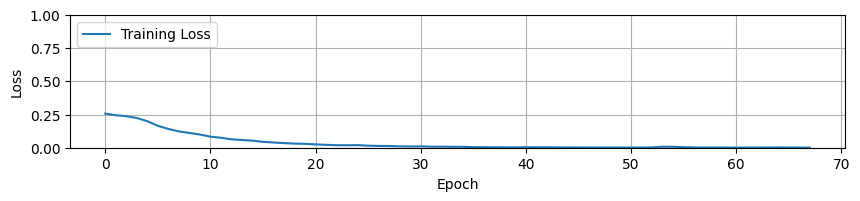

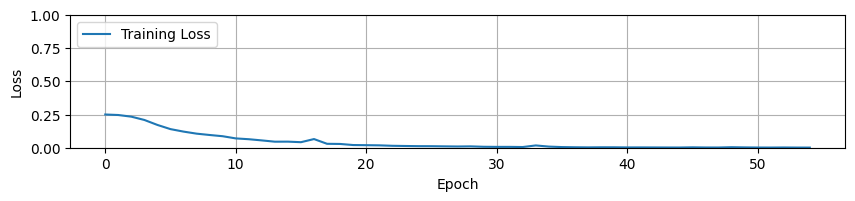

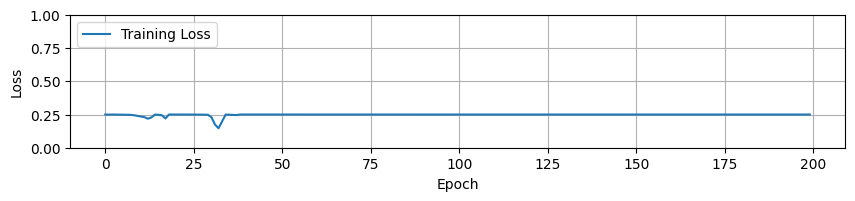

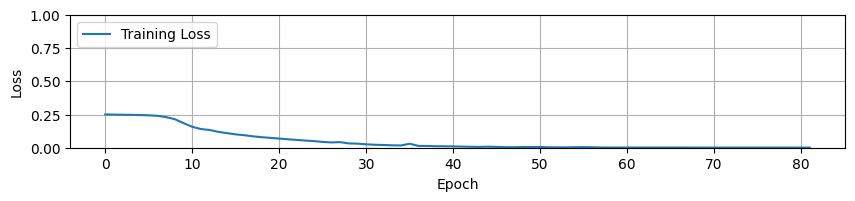

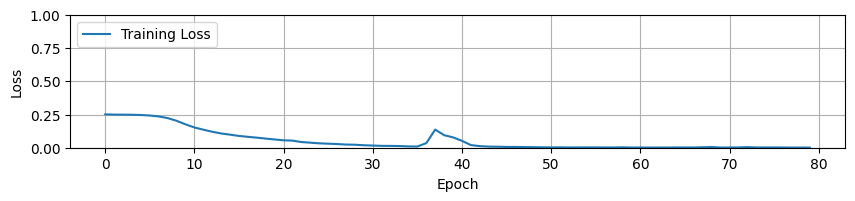

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 10:04:40.239992


Epoch-Accuracy Chart

Mean accuracy: 0.90
Standard deviation: 0.20
Individual fold accuracies: [0.999125, 0.9985, 0.50525, 0.998875, 0.998125]


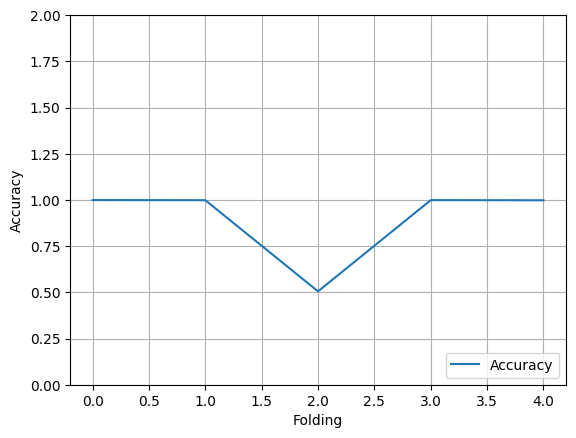

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

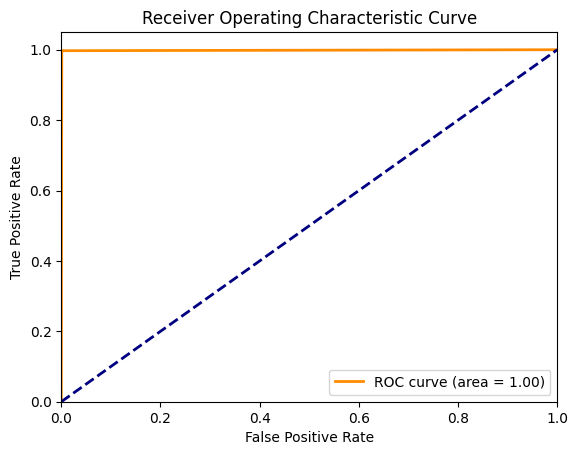

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 [==============================] - 0s 90ms/step
Confusion Matrix:
[[47  3]
 [ 3 47]]
--------------------------
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 score: 0.94


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


####Training Resnet50 with Aug_img

Epoch 1/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 88s 34ms/step - accuracy: 0.8583 - loss: 0.4827 - val_accuracy: 0.5940 - val_loss: 5.2033
Epoch 2/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9695 - loss: 0.0847 - val_accuracy: 0.7067 - val_loss: 20.9709
Epoch 3/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9782 - loss: 0.0662 - val_accuracy: 0.8816 - val_loss: 0.4097
Epoch 4/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9817 - loss: 0.0500 - val_accuracy: 0.5166 - val_loss: 8.8465
Epoch 5/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9882 - loss: 0.0341 - val_accuracy: 0.9499 - val_loss: 0.1603
Epoch 6/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9899 - loss: 0.0293 - val_accuracy: 0.8574 - val_loss: 0.3761
Epoch 7/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9898 - loss: 0.0278 - val_accuracy: 0.7803 - val_loss: 1.0222
Epoch 8/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy:

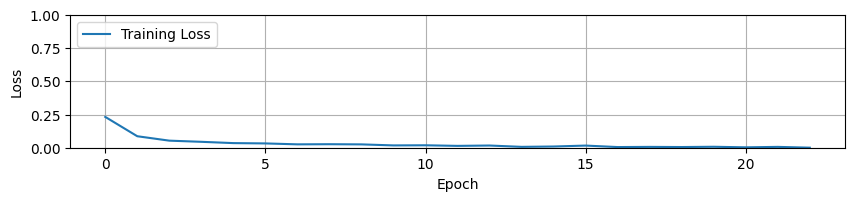

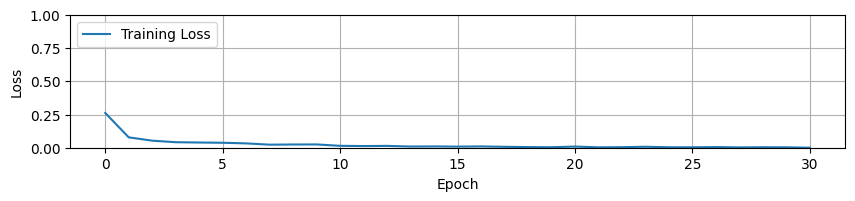

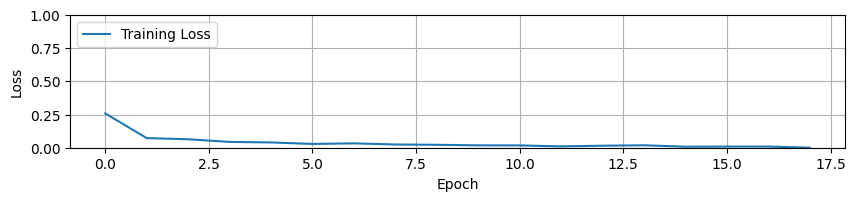

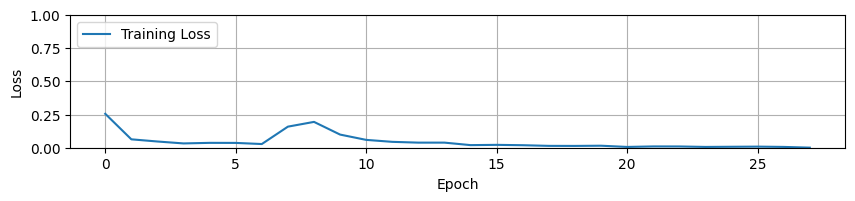

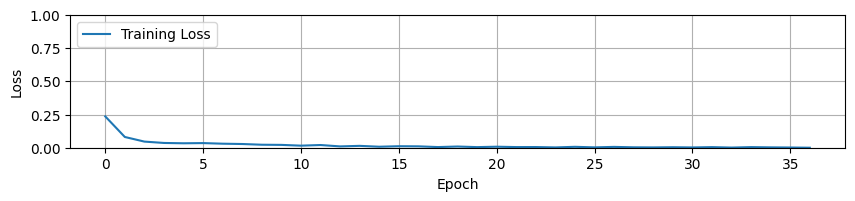

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = resnet50()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

Mean accuracy: 0.99
Standard deviation: 0.03
Individual fold accuracies: [0.935625, 0.999625, 0.99175, 0.999875, 1.0]


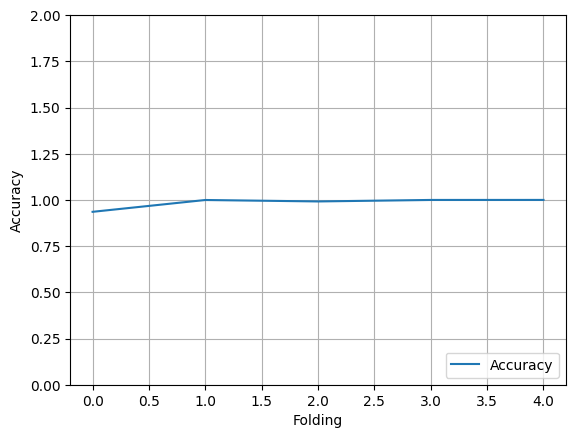

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

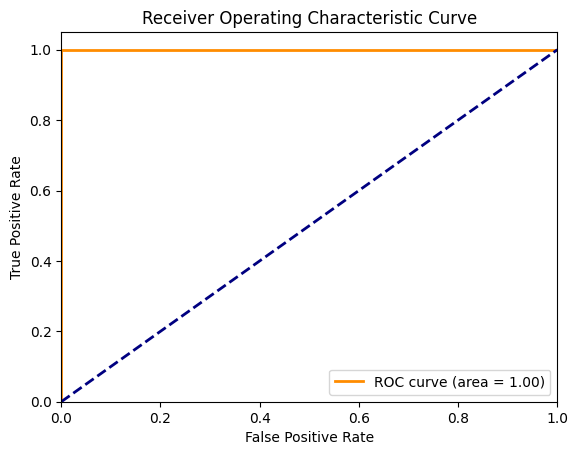

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
Confusion Matrix:
[[50  0]
 [ 1 49]]
--------------------------
Accuracy: 0.99
Precision: 0.9901960784313725
Recall: 0.99
F1 score: 0.98999899989999


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_resnet50.h5')

####Training InceptionV3 with Aug_img

Epoch 1/200
1000/1000 [==============================] - 89s 53ms/step - loss: 0.2007 - accuracy: 0.9272 - val_loss: 0.3417 - val_accuracy: 0.8953
Epoch 2/200
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0947 - accuracy: 0.9687 - val_loss: 0.1200 - val_accuracy: 0.9525
Epoch 3/200
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0842 - accuracy: 0.9722 - val_loss: 2.3609 - val_accuracy: 0.6766
Epoch 4/200
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0781 - accuracy: 0.9742 - val_loss: 0.1365 - val_accuracy: 0.9553
Epoch 5/200
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0891 - accuracy: 0.9684 - val_loss: 0.2314 - val_accuracy: 0.9276
Epoch 6/200
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0527 - accuracy: 0.9828 - val_loss: 0.0588 - val_accuracy: 0.9780
Epoch 7/200
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0

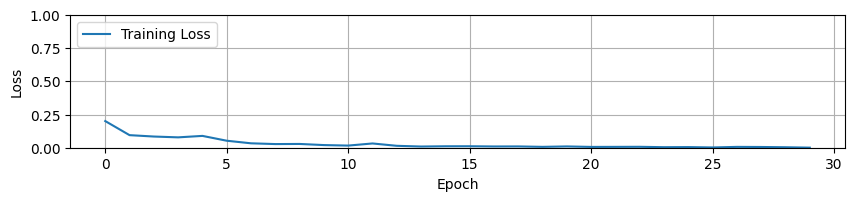

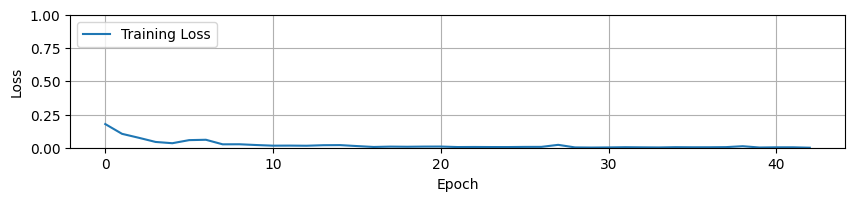

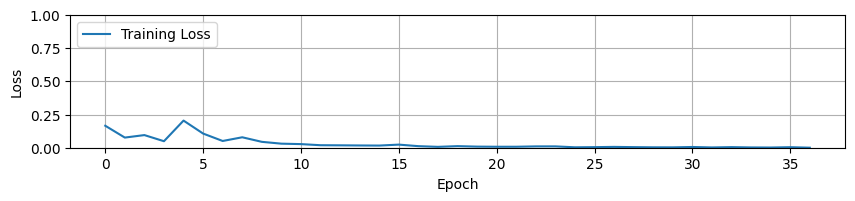

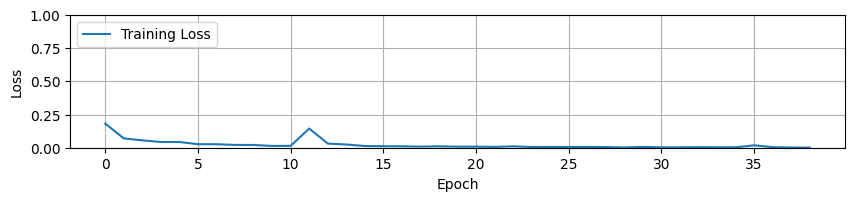

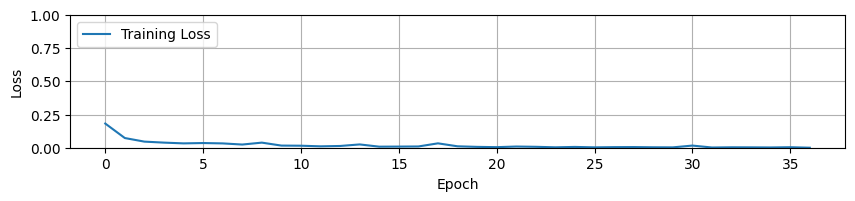

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = inceptionv3()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

Mean accuracy: 1.00
Standard deviation: 0.00
Individual fold accuracies: [0.99975, 1.0, 0.99925, 0.992875, 1.0]


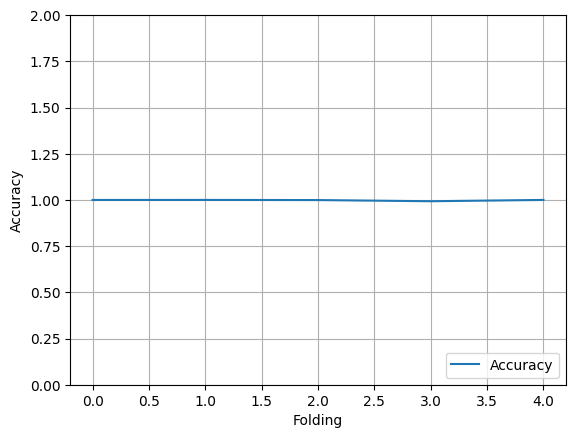

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

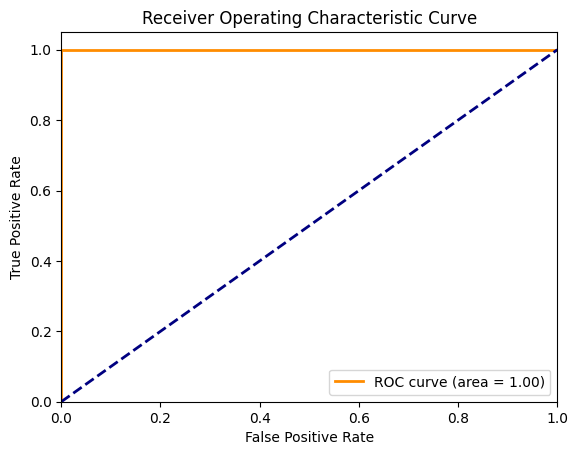

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 [==============================] - 2s 219ms/step
Confusion Matrix:
[[50  0]
 [ 0 50]]
--------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_inceptionv3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


####Training VGG16 with Aug_img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = vgg16()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch 1/200
   6/1000 [..............................] - ETA: 24s - loss: 1622.1940 - accuracy: 0.5156

1000/1000 [==============================] - 39s 28ms/step - loss: 10.4452 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 2/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 3/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6933 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5014
Epoch 4/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6933 - val_accuracy: 0.5014
Epoch 5/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 6/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 7/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/200
   5/1000 [..............................] - ETA: 28s - loss: 5484.2930 - accuracy: 0.5437

1000/1000 [==============================] - 33s 28ms/step - loss: 28.1114 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 2/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 3/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 4/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 5/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4954
Epoch 6/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 7/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/200
   5/1000 [..............................] - ETA: 28s - loss: 461.8732 - accuracy: 0.5875

1000/1000 [==============================] - 33s 28ms/step - loss: 3.0897 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4941
Epoch 2/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6933 - accuracy: 0.5022 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 3/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 4/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 5/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 6/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6936 - val_accuracy: 0.4941
Epoch 7/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6933 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/200
   5/1000 [..............................] - ETA: 28s - loss: 1069.5107 - accuracy: 0.4750

1000/1000 [==============================] - 32s 28ms/step - loss: 6.0385 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 2/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6934 - val_accuracy: 0.4967
Epoch 3/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 4/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 5/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 6/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 7/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/200
   5/1000 [..............................] - ETA: 28s - loss: 1628.9669 - accuracy: 0.5437

1000/1000 [==============================] - 33s 28ms/step - loss: 8.8359 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4966
Epoch 2/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4928 - val_loss: 0.6932 - val_accuracy: 0.4966
Epoch 3/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5034
Epoch 4/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.5034
Epoch 5/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5034
Epoch 6/200
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4966
Epoch 7/200
1000/1000 [==============================] - 27s 27ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6932 - val_

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_vgg16.h5')

####Training Densenet121 with Aug_img

Epoch 1/200
1000/1000 [==============================] - 148s 84ms/step - loss: 0.1659 - accuracy: 0.9381 - val_loss: 1.9873 - val_accuracy: 0.6219
Epoch 2/200
1000/1000 [==============================] - 79s 79ms/step - loss: 0.0797 - accuracy: 0.9722 - val_loss: 21.0730 - val_accuracy: 0.5015
Epoch 3/200
1000/1000 [==============================] - 78s 78ms/step - loss: 0.0491 - accuracy: 0.9834 - val_loss: 20.4861 - val_accuracy: 0.5014
Epoch 4/200
1000/1000 [==============================] - 77s 77ms/step - loss: 0.0383 - accuracy: 0.9868 - val_loss: 0.5742 - val_accuracy: 0.8599
Epoch 5/200
1000/1000 [==============================] - 77s 77ms/step - loss: 0.0295 - accuracy: 0.9898 - val_loss: 1.6985 - val_accuracy: 0.7691
Epoch 6/200
1000/1000 [==============================] - 79s 79ms/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 1.3753 - val_accuracy: 0.8138
Epoch 7/200
1000/1000 [==============================] - 79s 79ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss

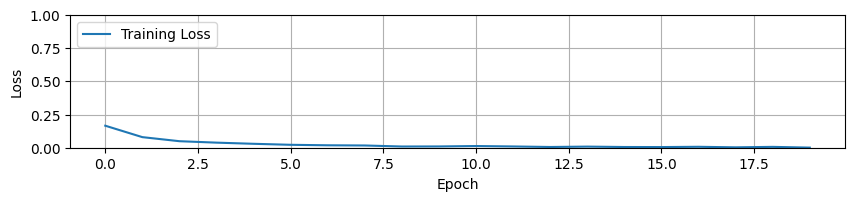

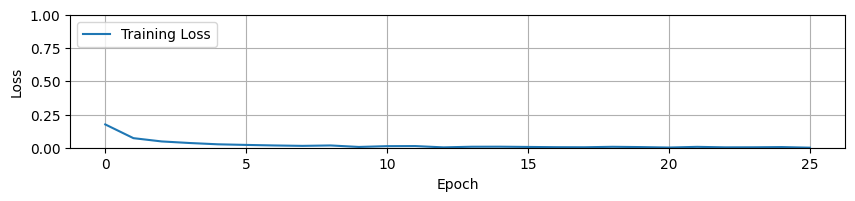

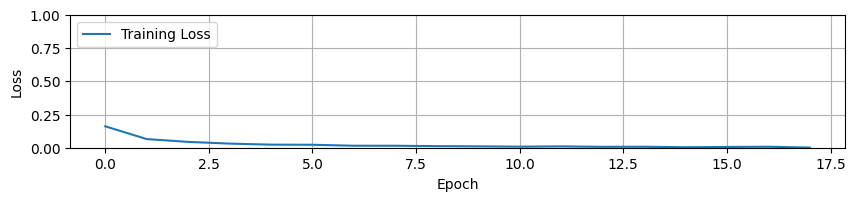

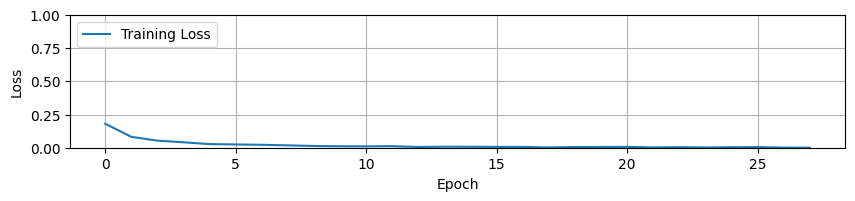

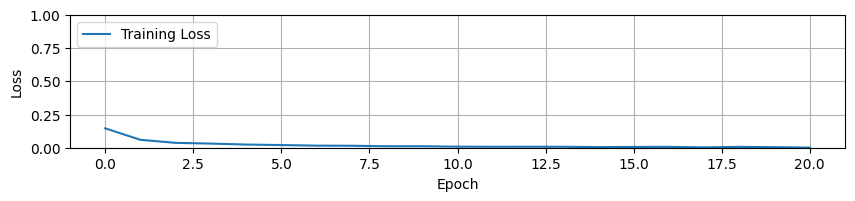

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = densenet121()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

Mean accuracy: 1.00
Standard deviation: 0.00
Individual fold accuracies: [0.99625, 1.0, 0.99925, 0.999875, 0.99975]


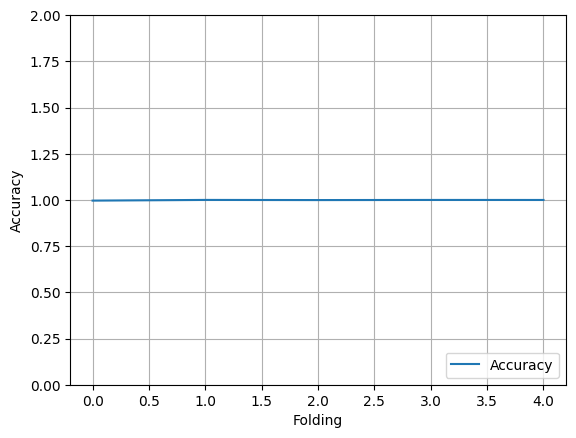

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

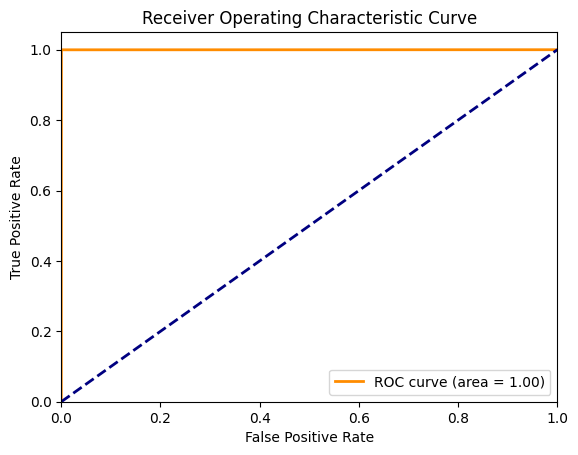

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 [==============================] - 2s 76ms/step
Confusion Matrix:
[[50  0]
 [ 4 46]]
--------------------------
Accuracy: 0.96
Precision: 0.962962962962963
Recall: 0.96
F1 score: 0.9599358974358975


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_densenet121.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


####Training Xception with Aug_img

Epoch 1/200
1000/1000 [==============================] - 70s 41ms/step - loss: 0.1300 - accuracy: 0.9515 - val_loss: 0.1667 - val_accuracy: 0.9410
Epoch 2/200
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0452 - accuracy: 0.9843 - val_loss: 0.5698 - val_accuracy: 0.8529
Epoch 3/200
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.1617 - val_accuracy: 0.9534
Epoch 4/200
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0232 - accuracy: 0.9922 - val_loss: 0.0516 - val_accuracy: 0.9851
Epoch 5/200
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0097 - val_accuracy: 0.9961
Epoch 6/200
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0515 - val_accuracy: 0.9826
Epoch 7/200
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0

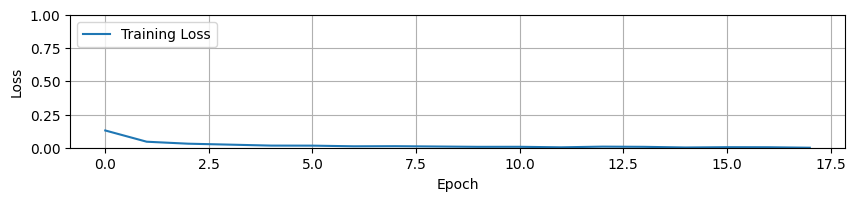

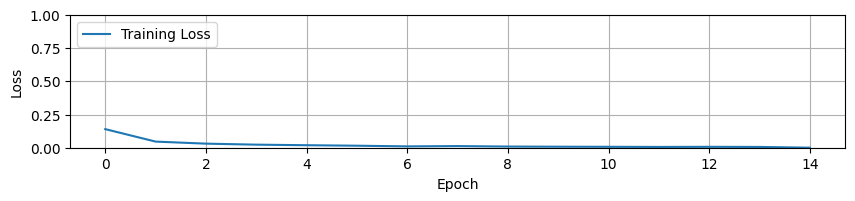

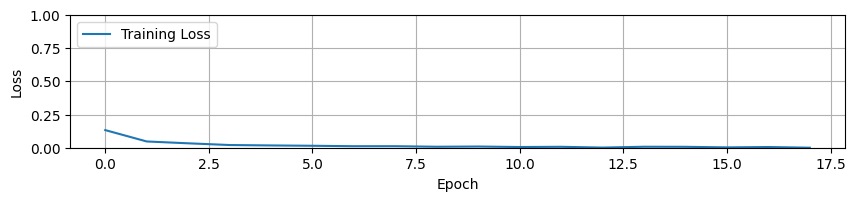

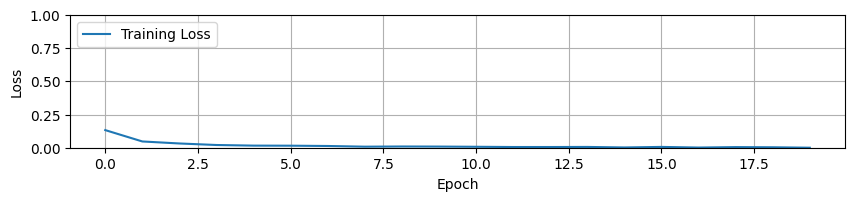

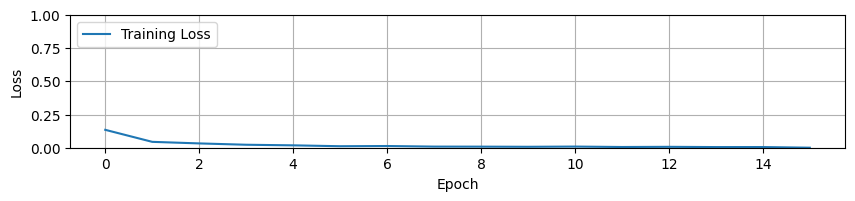

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = xception()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

Mean accuracy: 1.00
Standard deviation: 0.00
Individual fold accuracies: [1.0, 0.992125, 0.9995, 1.0, 0.99975]


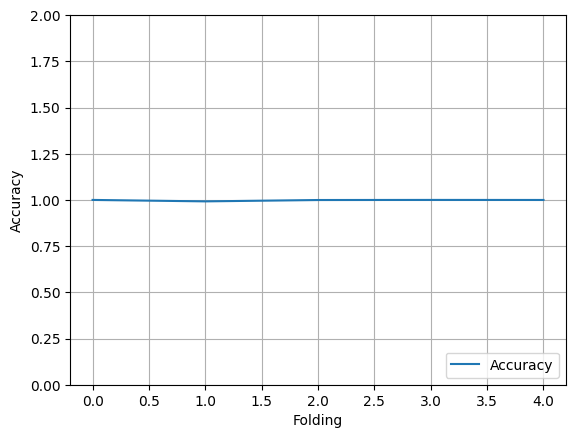

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

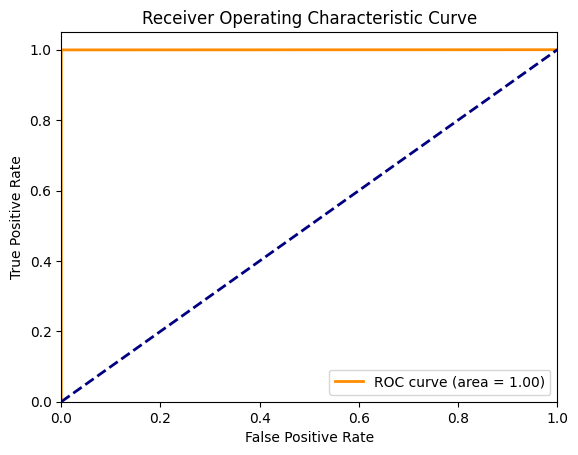

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 [==============================] - 1s 69ms/step
Confusion Matrix:
[[50  0]
 [ 3 47]]
--------------------------
Accuracy: 0.97
Precision: 0.9716981132075472
Recall: 0.97
F1 score: 0.9699729756781104


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Model: Cumulative Transfer learning

###Prepare Images Dataset

Load Images Function

In [ ]:
import os
import cv2

def loadimages(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

Set Image Size

In [ ]:
imsize = 128

Import an Training Images Path

In [ ]:
img_0_path = []
img_0_path += ["/content/dataset/01_training_dataset/Class0"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_r"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_gb"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_gn"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_mf"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_sp"]

In [ ]:
img_1_path = []
img_1_path += ["/content/dataset/01_training_dataset/Class1"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_r"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_gb"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_gn"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_mf"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_sp"]

Import an Testing Images

In [ ]:
test_img_0 = []
test_img_0 += loadimages("/content/dataset/02_testing_dataset/Class0")
test_img_1 = []
test_img_1 += loadimages("/content/dataset/02_testing_dataset/Class1")

test_img = []
test_img += test_img_0
test_img += test_img_1

test_img_0_label = []
test_img_0_label += [0 for i in test_img_0]
test_img_1_label = []
test_img_1_label += [1 for i in test_img_1]

test_img_label = []
test_img_label += test_img_0_label
test_img_label += test_img_1_label

print(len(test_img),',',len(test_img_label))

100 , 100


###Cumulative Transfer Learning: Iteration 0

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[0])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[0])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

2000 , 2000


Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
import datetime

current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 10:41:48.653454


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4990 - loss: 0.2823 - val_accuracy: 0.4900 - val_loss: 0.2749
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5226 - loss: 0.2636 - val_accuracy: 0.4900 - val_loss: 0.2656
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5215 - loss: 0.2570 - val_accuracy: 0.4900 - val_loss: 0.2594
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5068 - loss: 0.2555 - val_accuracy: 0.4900 - val_loss: 0.2556
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4956 - loss: 0.2541 - val_accuracy: 0.4900 - val_loss: 0.2533
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4991 - loss: 0.2520 - val_accuracy: 0.4900 - val_loss: 0.2520
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5113 - loss: 0.2501 - val_accuracy: 0.4900 - val_loss: 0.2512
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5073 - loss: 0.2501 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5018 - loss: 0.2707 - val_accuracy: 0.5200 - val_loss: 0.2622
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4826 - loss: 0.2691 - val_accuracy: 0.5200 - val_loss: 0.2582
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4994 - loss: 0.2611 - val_accuracy: 0.5200 - val_loss: 0.2552
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4778 - loss: 0.2609 - val_accuracy: 0.5200 - val_loss: 0.2532
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4984 - loss: 0.2554 - val_accuracy: 0.5200 - val_loss: 0.2517
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4797 - loss: 0.2555 - val_accuracy: 0.5200 - val_loss: 0.2508
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4956 - loss: 0.2526 - val_accuracy: 0.5200 - val_loss: 0.2502
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5054 - loss: 0.2510 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4871 - loss: 0.2650 - val_accuracy: 0.5075 - val_loss: 0.2568
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4768 - loss: 0.2611 - val_accuracy: 0.5075 - val_loss: 0.2537
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5070 - loss: 0.2532 - val_accuracy: 0.5075 - val_loss: 0.2518
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5095 - loss: 0.2513 - val_accuracy: 0.5075 - val_loss: 0.2507
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4950 - loss: 0.2515 - val_accuracy: 0.5075 - val_loss: 0.2501
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5099 - loss: 0.2499 - val_accuracy: 0.5075 - val_loss: 0.2496
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5088 - loss: 0.2496 - val_accuracy: 0.5075 - val_loss: 0.2494
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5078 - loss: 0.2494 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5088 - loss: 0.2728 - val_accuracy: 0.4875 - val_loss: 0.2688
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5117 - loss: 0.2608 - val_accuracy: 0.4875 - val_loss: 0.2610
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5073 - loss: 0.2564 - val_accuracy: 0.4875 - val_loss: 0.2569
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4920 - loss: 0.2556 - val_accuracy: 0.4875 - val_loss: 0.2546
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5062 - loss: 0.2521 - val_accuracy: 0.4875 - val_loss: 0.2531
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5137 - loss: 0.2505 - val_accuracy: 0.4875 - val_loss: 0.2520
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5137 - loss: 0.2500 - val_accuracy: 0.4875 - val_loss: 0.2513
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5277 - loss: 0.2488 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4918 - loss: 0.2780 - val_accuracy: 0.4950 - val_loss: 0.2707
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4956 - loss: 0.2688 - val_accuracy: 0.4950 - val_loss: 0.2637
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4904 - loss: 0.2631 - val_accuracy: 0.4950 - val_loss: 0.2586
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5045 - loss: 0.2562 - val_accuracy: 0.4950 - val_loss: 0.2554
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5039 - loss: 0.2538 - val_accuracy: 0.4950 - val_loss: 0.2534
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5075 - loss: 0.2518 - val_accuracy: 0.4950 - val_loss: 0.2520
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4890 - loss: 0.2522 - val_accuracy: 0.4950 - val_loss: 0.2511
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4998 - loss: 0.2506 - val_accuracy: 0.

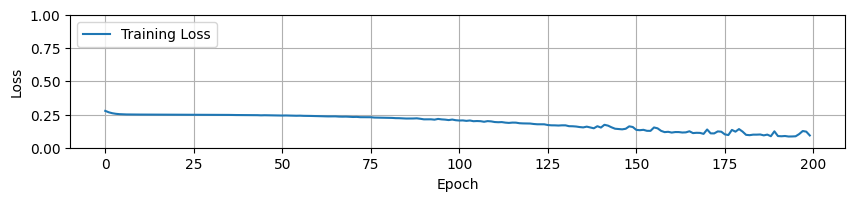

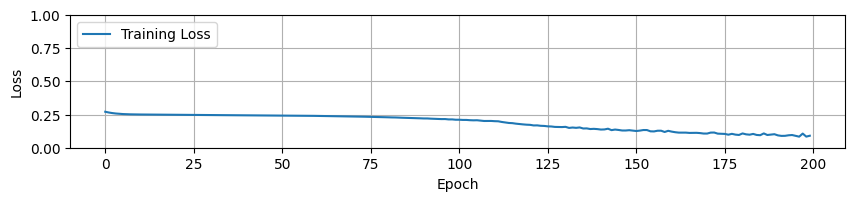

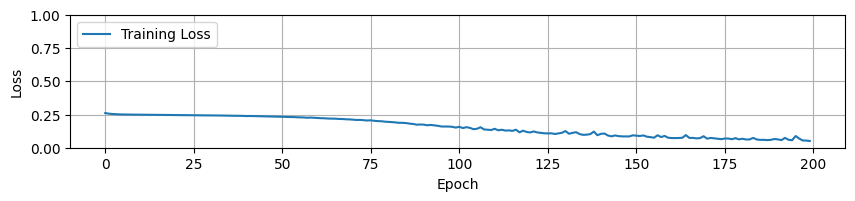

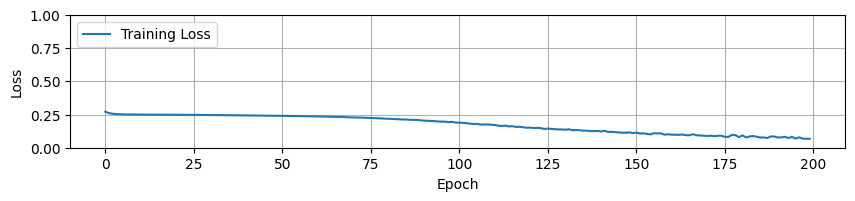

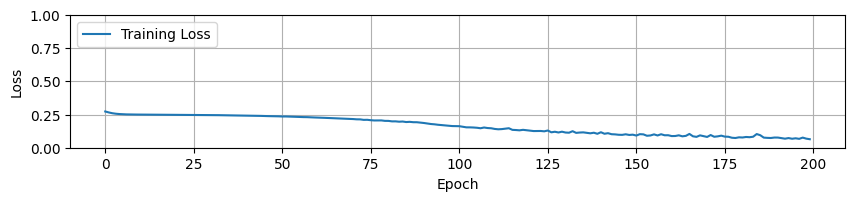

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 10:54:41.420238


Epoch-Accuracy Chart

Mean accuracy: 0.86
Standard deviation: 0.03
Individual fold accuracies: [0.81, 0.88, 0.8925, 0.8675, 0.8675]


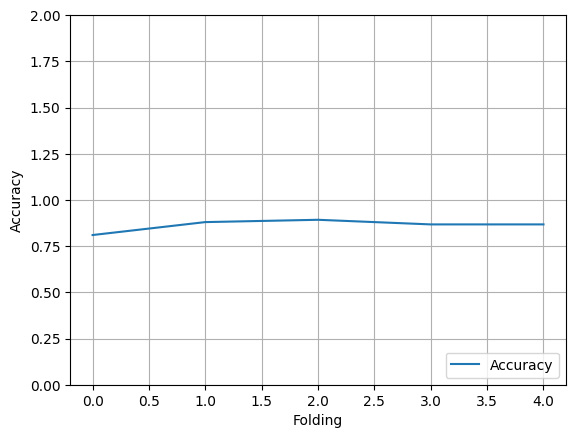

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

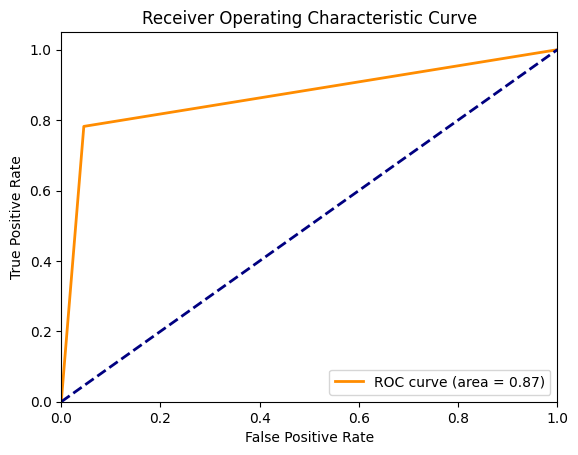

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Confusion Matrix:
[[48  2]
 [33 17]]
--------------------------
Accuracy: 0.65
Precision: 0.7436647173489278
Recall: 0.65
F1 score: 0.612789025334661


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite0.keras')

###Cumulative Transfer Learning: Iteration 1

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[1])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[1])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

8000 , 8000


Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 10:55:18.405021


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8712 - loss: 0.1033 - val_accuracy: 0.8781 - val_loss: 0.0964
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8774 - loss: 0.0964 - val_accuracy: 0.8875 - val_loss: 0.0901
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8528 - loss: 0.1137 - val_accuracy: 0.8950 - val_loss: 0.0869
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8866 - loss: 0.0919 - val_accuracy: 0.8913 - val_loss: 0.0919
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8860 - loss: 0.0917 - val_accuracy: 0.8512 - val_loss: 0.1102
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8933 - loss: 0.0887 - val_accuracy: 0.9169 - val_loss: 0.0728
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9034 - loss: 0.0810 - val_accuracy: 0.8544 - val_loss: 0.1111
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8953 - loss: 0.0854 - 

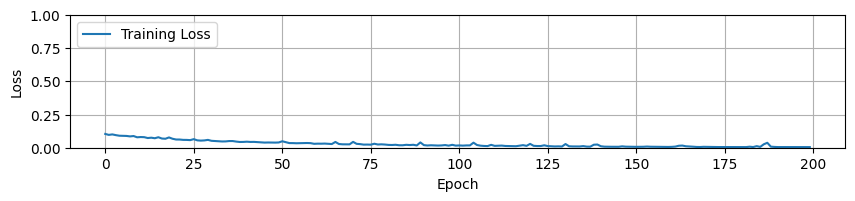

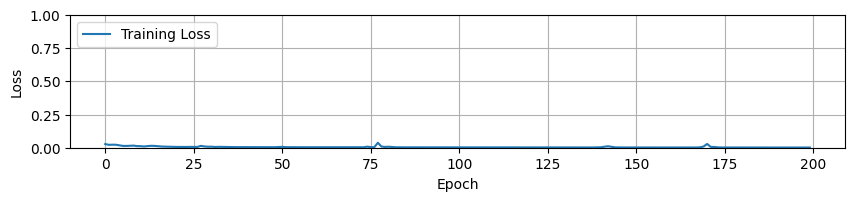

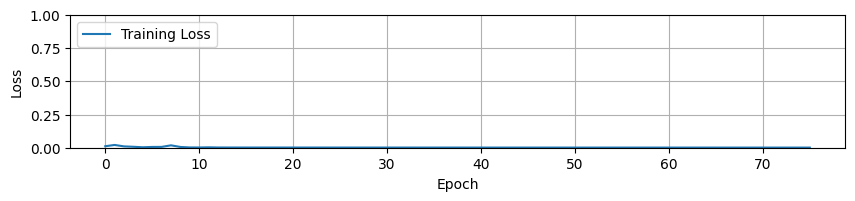

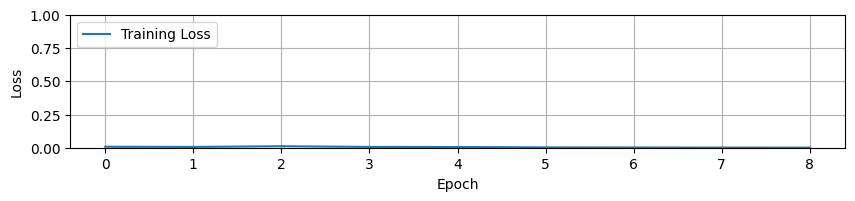

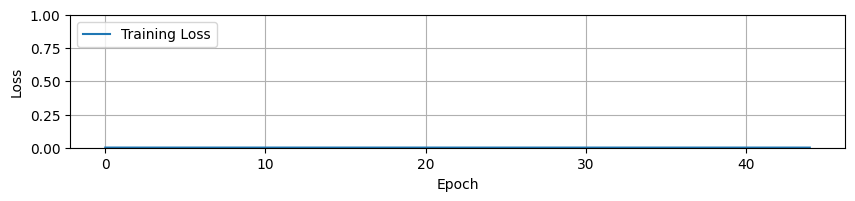

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:20:21.107728


Epoch-Accuracy Chart

Mean accuracy: 0.99
Standard deviation: 0.02
Individual fold accuracies: [0.953125, 0.989375, 0.996875, 0.998125, 0.999375]


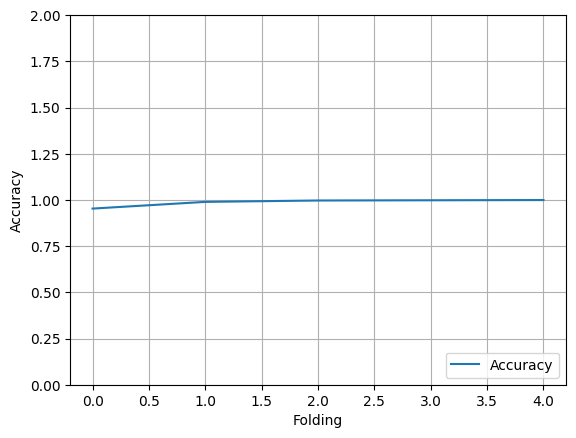

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

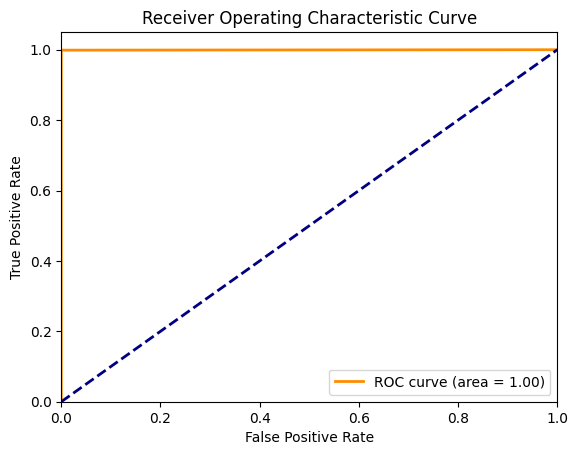

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[48  2]
 [ 5 45]]
--------------------------
Accuracy: 0.93
Precision: 0.9315535929345645
Recall: 0.93
F1 score: 0.9299369432489241


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite1.keras')

###Cumulative Transfer Learning: Iteration 2

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[2])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[2])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

8000 , 8000


Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:20:56.273873


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9995 - loss: 7.7268e-04 - val_accuracy: 1.0000 - val_loss: 2.5820e-04
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9990 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.3664e-04
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9990 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.6466e-04
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9992 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 2.6166e-04
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9991 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.6089e-04
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9991 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.6132e-04
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9990 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.6268e-04
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - ac

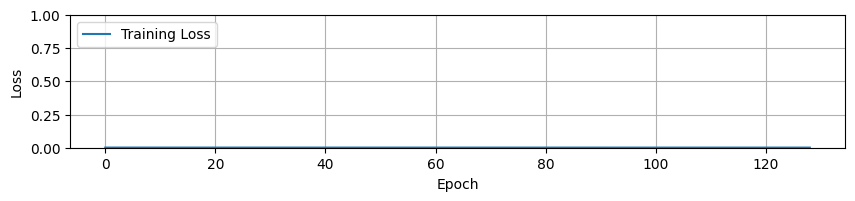

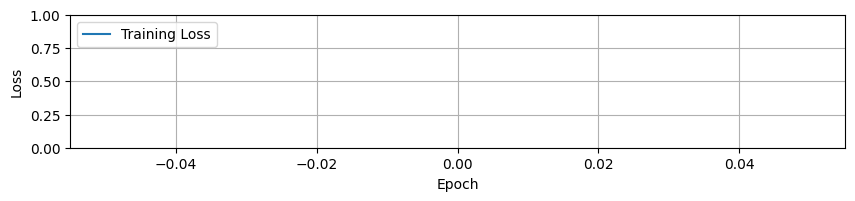

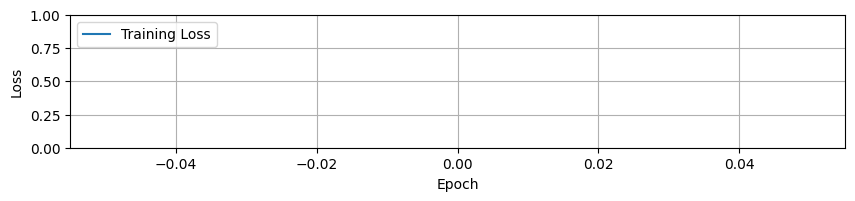

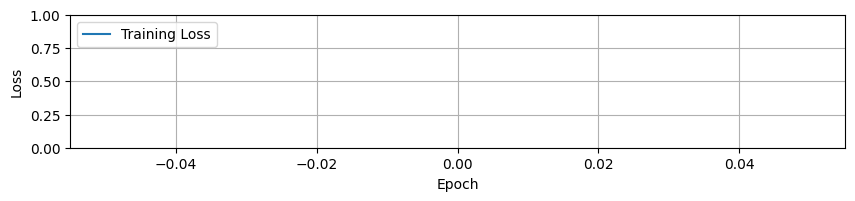

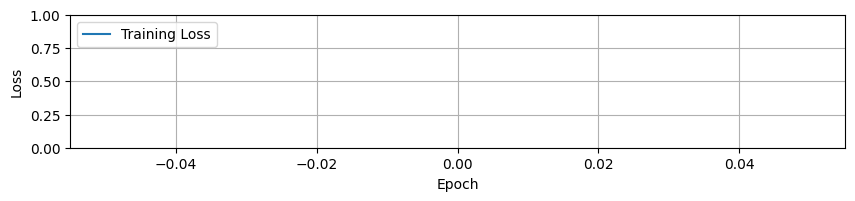

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:27:18.177087


Epoch-Accuracy Chart

Mean accuracy: 1.00
Standard deviation: 0.00
Individual fold accuracies: [0.999375, 1.0, 0.99875, 0.99875, 0.999375]


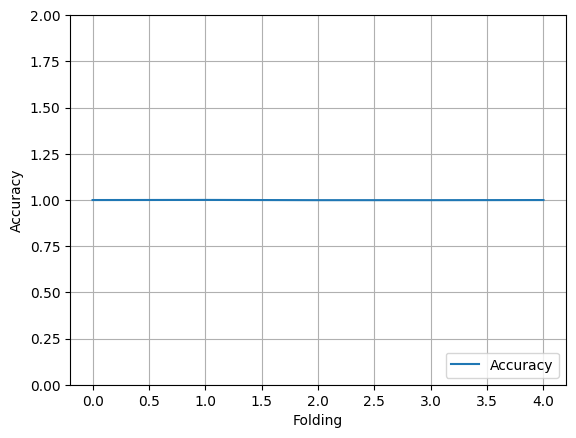

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

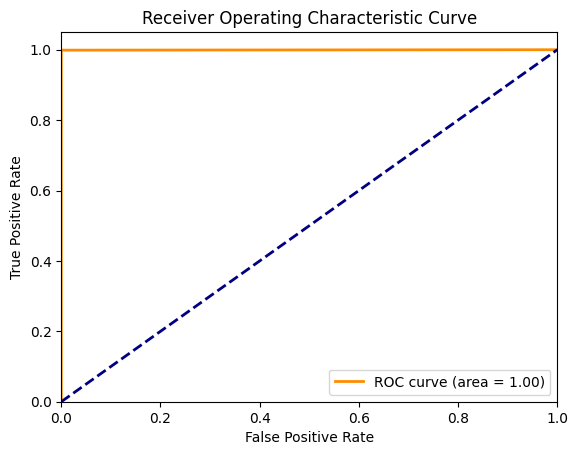

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[48  2]
 [ 4 46]]
--------------------------
Accuracy: 0.94
Precision: 0.9407051282051282
Recall: 0.94
F1 score: 0.9399759903961583


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite2.keras')

###Cumulative Transfer Learning: Iteration 3

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[3])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[3])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

8000 , 8000


Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:27:54.852443


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9993 - loss: 8.4316e-04 - val_accuracy: 1.0000 - val_loss: 2.1736e-04
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[816   0]
 [  0 784]]
--------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9987 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.7438e-04
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[809   0]
 [  0 791]]
--------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9996 - loss: 5.6981e-04 - val_accuracy: 0.9987 - val_loss: 0.0014
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[812   0]
 [  2 786]]
--------------------------
Accuracy: 0.99875
Precision: 0.9987530712530713
Recall: 0.99875
F1 score: 0.9987499746026686
Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.99

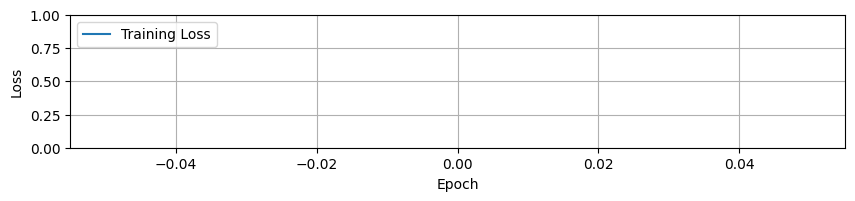

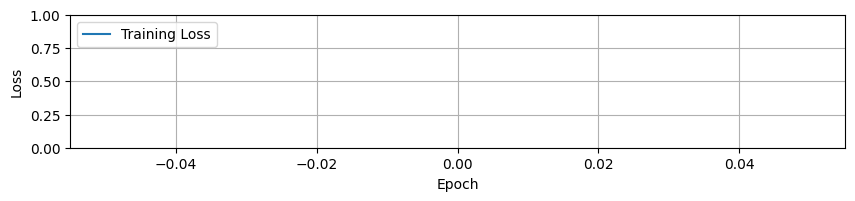

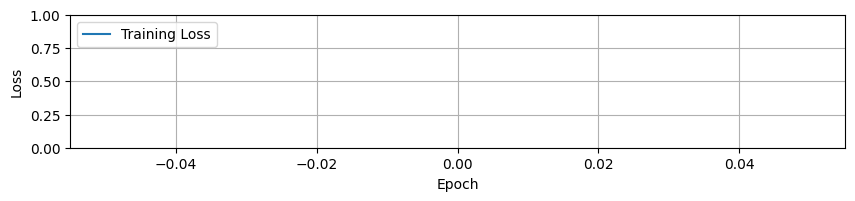

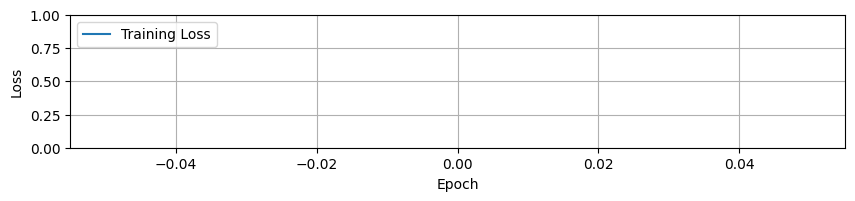

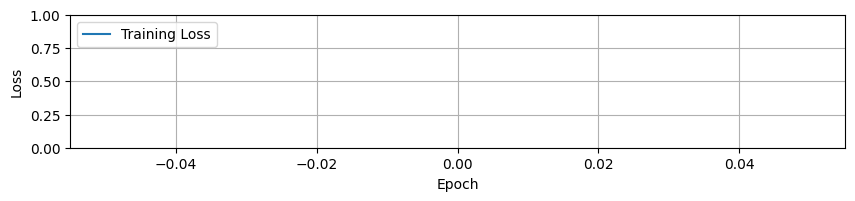

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:28:18.078607


Epoch-Accuracy Chart

Mean accuracy: 1.00
Standard deviation: 0.00
Individual fold accuracies: [1.0, 1.0, 0.99875, 0.99875, 0.999375]


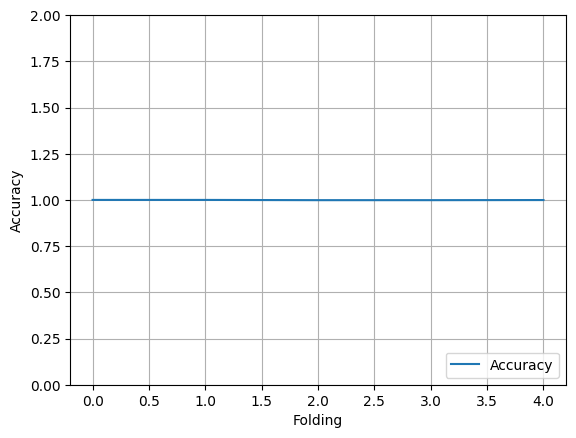

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

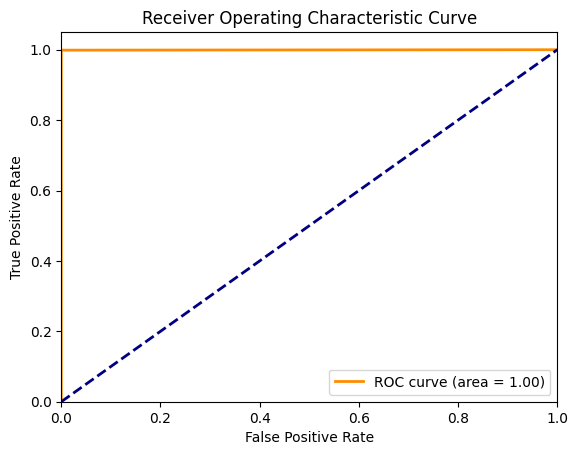

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[48  2]
 [ 5 45]]
--------------------------
Accuracy: 0.93
Precision: 0.9315535929345645
Recall: 0.93
F1 score: 0.9299369432489241


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite3.keras')

###Cumulative Transfer Learning: Iteration 4

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[4])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[4])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

8000 , 8000


Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:28:53.124102


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9998 - loss: 5.9254e-04 - val_accuracy: 1.0000 - val_loss: 2.6246e-04
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9988 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.3345e-04
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[816   0]
 [  0 784]]
--------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9993 - loss: 8.6872e-04 - val_accuracy: 1.0000 - val_loss: 1.6295e-04
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[809   0]
 [  0 791]]
--------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9996 - loss: 6.0127e-04 - val_accuracy: 0.9987 - val_loss: 0.0014
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[812   0]
 [  2 786]]
--------------------------
Accuracy: 0.99875
Precisi

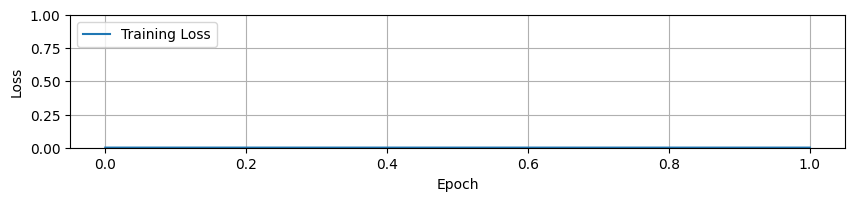

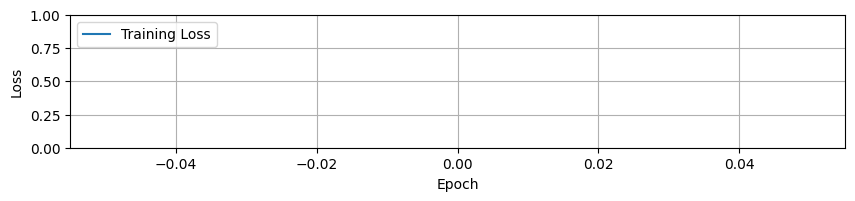

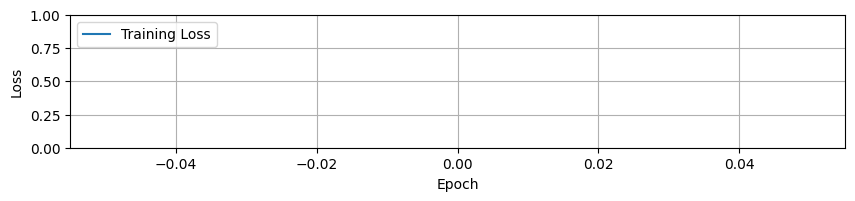

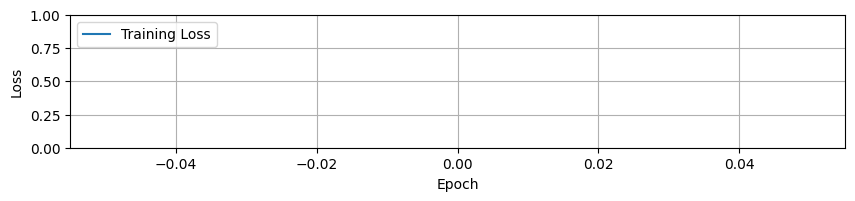

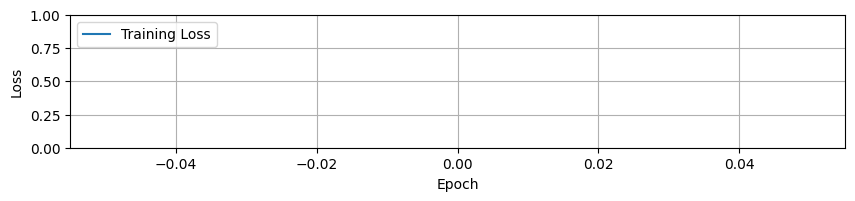

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:29:19.236299


Epoch-Accuracy Chart

Mean accuracy: 1.00
Standard deviation: 0.00
Individual fold accuracies: [1.0, 1.0, 0.99875, 0.99875, 0.999375]


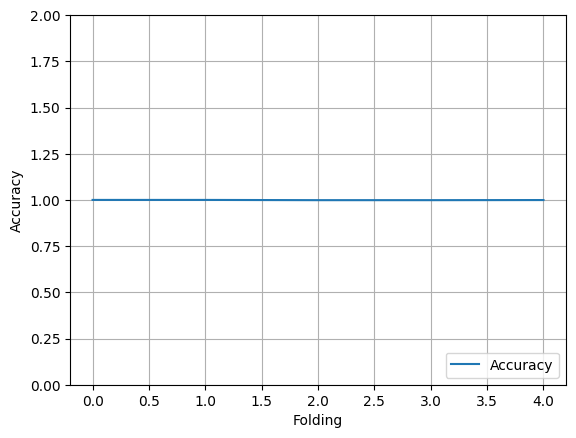

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

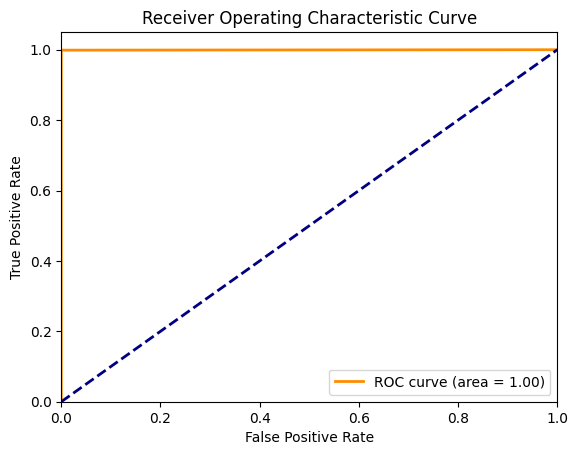

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[48  2]
 [ 5 45]]
--------------------------
Accuracy: 0.93
Precision: 0.9315535929345645
Recall: 0.93
F1 score: 0.9299369432489241


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite4.keras')

###Cumulative Transfer Learning: Iteration 5

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[5])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[5])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

8000 , 8000


Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:29:56.057174


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9730 - loss: 0.0211 - val_accuracy: 0.9906 - val_loss: 0.0072
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9807 - loss: 0.0156 - val_accuracy: 0.9925 - val_loss: 0.0049
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9903 - loss: 0.0081 - val_accuracy: 0.9912 - val_loss: 0.0067
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9920 - loss: 0.0064 - val_accuracy: 0.9919 - val_loss: 0.0066
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9944 - loss: 0.0051 - val_accuracy: 0.9962 - val_loss: 0.0031
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9967 - loss: 0.0031 - val_accuracy: 0.9975 - val_loss: 0.0024
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9936 - loss: 0.0060 - val_accuracy: 0.9987 - val_loss: 0.0022
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9987 - loss: 0.0016 - 

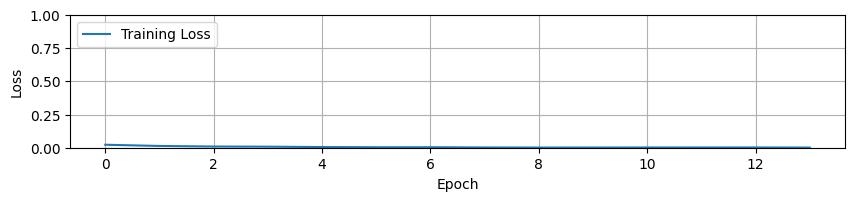

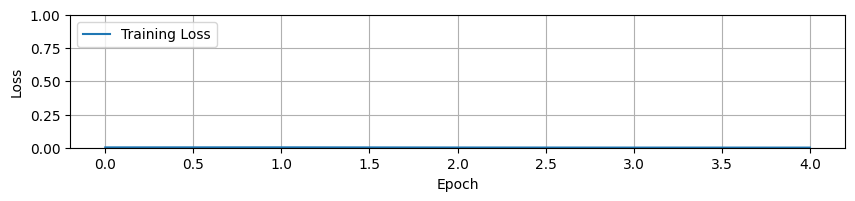

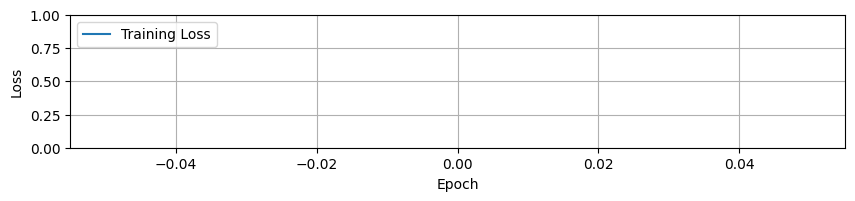

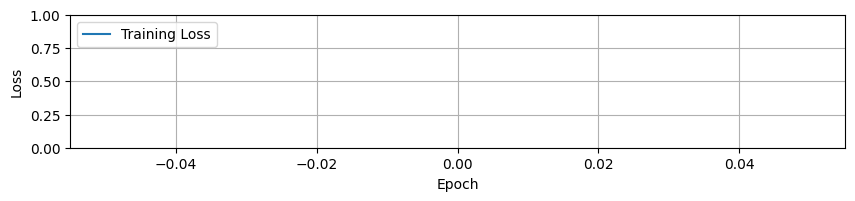

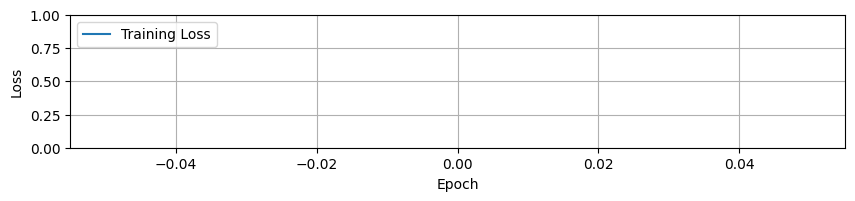

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

time: 11:31:07.593183


Epoch-Accuracy Chart

Mean accuracy: 1.00
Standard deviation: 0.00
Individual fold accuracies: [0.999375, 1.0, 0.99875, 0.99875, 0.999375]


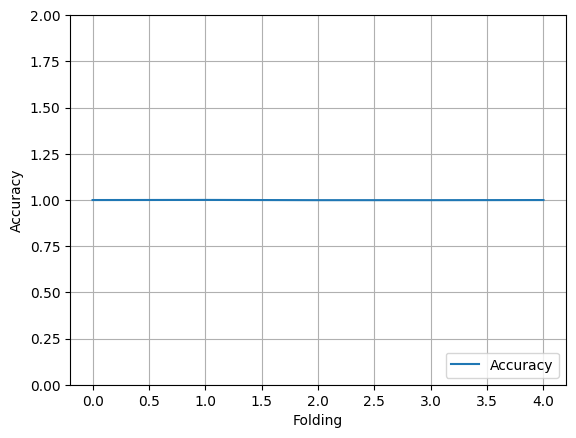

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

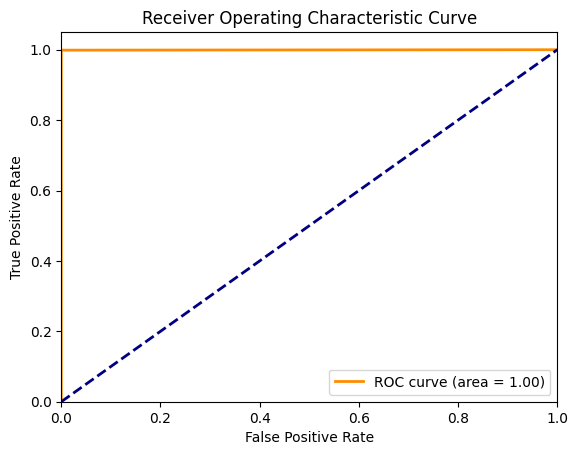

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[50  0]
 [28 22]]
--------------------------
Accuracy: 0.72
Precision: 0.8205128205128205
Recall: 0.72
F1 score: 0.6961805555555556


Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite5.keras')